# Assignment -
### Predictiong credit card fraud detection using Artificial Neural Network ANN 
### Dataset Information -
- The datasets contain transactions made by credit cards in September 2013 by European cardholders.
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. 
- It contains only numerical input variables which are the result of a PCA transformation.
- Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 
- Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
- The feature 'Amount' is the transaction Amount, this feature can be used for exampledependant cost-sensitive learning. 
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Final Conclusion ( for ease i haved added conclusion at the top )
- Model 5 is performing better as compare to other model with threshold of 0.25.
- after comparing all ANN model Model 5 is best but we may modify the model or reduce the layer to work with similar output if possible.
- Model 5 accuracy
    1. Training Acc = 99.86
    2. Testing Acc = 99.90
- Model 5 Loss
    1. Training Loss =  0.0053
    2. Testing Loss = 0.0042
- Model 5 Precision 
    1. Training Precision = 0.8211 
    2. Testing Precision = 0.8409

- Model 5 is predicting 113 fraud out of 136 are fraud trans but not able to predict remaining 23 which is also doing better than other models
- Model 5 test average precision score with th 0.25 is 0.6855955056139688.


#### Architecture of Model 5
- This model has 11 hidden layers with variable neurons (256, 128 , 64, 32) and input layer with 29 neurons and op layer with 1 neuron which uses sigmoid activation function which soften the output rather than direct 0 and 1 and it pass 0 if op <0 else 1.
- we have used all default optimizers and loss function with early stopping to stop the training of model and dropout to drop 20%  or 10% of neurons connection to make our model robust


# Starting 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam

In [134]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

In [135]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000,-1.360,-0.073,2.536,1.378,-0.338,0.462,0.240,0.099,0.364,...,-0.018,0.278,-0.110,0.067,0.129,-0.189,0.134,-0.021,149.620,0
1,0.000,1.192,0.266,0.166,0.448,0.060,-0.082,-0.079,0.085,-0.255,...,-0.226,-0.639,0.101,-0.340,0.167,0.126,-0.009,0.015,2.690,0
2,1.000,-1.358,-1.340,1.773,0.380,-0.503,1.800,0.791,0.248,-1.515,...,0.248,0.772,0.909,-0.689,-0.328,-0.139,-0.055,-0.060,378.660,0
3,1.000,-0.966,-0.185,1.793,-0.863,-0.010,1.247,0.238,0.377,-1.387,...,-0.108,0.005,-0.190,-1.176,0.647,-0.222,0.063,0.061,123.500,0
4,2.000,-1.158,0.878,1.549,0.403,-0.407,0.096,0.593,-0.271,0.818,...,-0.009,0.798,-0.137,0.141,-0.206,0.502,0.219,0.215,69.990,0
5,2.000,-0.426,0.961,1.141,-0.168,0.421,-0.030,0.476,0.260,-0.569,...,-0.208,-0.560,-0.026,-0.371,-0.233,0.106,0.254,0.081,3.670,0
6,4.000,1.230,0.141,0.045,1.203,0.192,0.273,-0.005,0.081,0.465,...,-0.168,-0.271,-0.154,-0.780,0.750,-0.257,0.035,0.005,4.990,0
7,7.000,-0.644,1.418,1.074,-0.492,0.949,0.428,1.121,-3.808,0.615,...,1.943,-1.015,0.058,-0.650,-0.415,-0.052,-1.207,-1.085,40.800,0
8,7.000,-0.894,0.286,-0.113,-0.272,2.670,3.722,0.370,0.851,-0.392,...,-0.073,-0.268,-0.204,1.012,0.373,-0.384,0.012,0.142,93.200,0
9,9.000,-0.338,1.120,1.044,-0.222,0.499,-0.247,0.652,0.070,-0.737,...,-0.247,-0.634,-0.121,-0.385,-0.070,0.094,0.246,0.083,3.680,0


- All the given data is already normalised or scaled.
- we can observe that the data is already preprocessed hence we doesn't need to preprocess the data.
- still to understand the given data will plot some plots and perform some stats testing.

In [136]:
pd.set_option('display.float_format', lambda data: '%.3f' % data)

In [137]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,...,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000,284807.000
mean,94813.860,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,88.350,0.002
std,47488.146,1.959,1.651,1.516,1.416,1.380,1.332,1.237,1.194,1.099,...,0.735,0.726,0.624,0.606,0.521,0.482,0.404,0.330,250.120,0.042
min,0.000,-56.408,-72.716,-48.326,-5.683,-113.743,-26.161,-43.557,-73.217,-13.434,...,-34.830,-10.933,-44.808,-2.837,-10.295,-2.605,-22.566,-15.430,0.000,0.000
25%,54201.500,-0.920,-0.599,-0.890,-0.849,-0.692,-0.768,-0.554,-0.209,-0.643,...,-0.228,-0.542,-0.162,-0.355,-0.317,-0.327,-0.071,-0.053,5.600,0.000
50%,84692.000,0.018,0.065,0.180,-0.020,-0.054,-0.274,0.040,0.022,-0.051,...,-0.029,0.007,-0.011,0.041,0.017,-0.052,0.001,0.011,22.000,0.000
75%,139320.500,1.316,0.804,1.027,0.743,0.612,0.399,0.570,0.327,0.597,...,0.186,0.529,0.148,0.440,0.351,0.241,0.091,0.078,77.165,0.000
max,172792.000,2.455,22.058,9.383,16.875,34.802,73.302,120.589,20.007,15.595,...,27.203,10.503,22.528,4.585,7.520,3.517,31.612,33.848,25691.160,1.000


- the data is not scaled or normalised  as we can observe there are some max values hence we have to normalise the data.


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- so there is no null value in te data

<AxesSubplot:xlabel='Class', ylabel='count'>

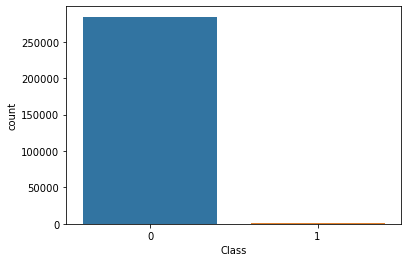

In [139]:
sns.countplot(df.Class)

- so here we can see that the data is totally biased toward no fraud happens.
- hence to balance the data or to avoid wrong prediction we have to take some sample from the data and need to generate the data for training and test

In [140]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

- there are too less data which describe about the fraud is happen.

In [141]:
df.Time

0             0.000
1             0.000
2             1.000
3             1.000
4             2.000
            ...    
284802   172786.000
284803   172787.000
284804   172788.000
284805   172788.000
284806   172792.000
Name: Time, Length: 284807, dtype: float64

- as we can see that the feature **Time** has huge value which cannot helpful in our prediction.
- also the credit card fraud is independent on time hence it is ok to drop that feature

In [142]:
df.drop('Time',axis=1,inplace=True)
df.shape

(284807, 30)

- we have dropped the feature Time which is not contributing towards target feature.
#### before performing any data preprocessing and data normalization we will build the ANN model so that we can compare it with others ANN model which we build after data processing.

In [143]:
X = df.drop('Class',axis=1)
y = df['Class']

In [144]:
X.shape,y.shape

((284807, 29), (284807,))

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
X_train.shape ,X_test.shape ,y_train.shape ,y_test.shape

((199364, 29), (85443, 29), (199364,), (85443,))

# Model 1

In [174]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import SGD,Adam

In [264]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(8,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 16)                480       
_________________________________________________________________
dense_81 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_82 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 5         
Total params: 657
Trainable params: 657
Non-trainable params: 0
_________________________________________________________________


## Model Architecture - 
- the input layer has 29 neurons followed by 16 neuron which are fully connected with in neurons.
- the model has 3 hidden layers with 1 input an 1 output layer with all default parameter.
- here we have used activation as relu in hidden and input layer which make 0 if neuron op is less than 0 else it pass the op as it is.
- in last layer we have used sigmoid as activation function which soften the output rather than direct 0 and 1 and it pass 0 if op <0 else 1.
- we have used all default optimizers and loss function.

In [265]:
model_his = model.fit(X,y,epochs=10,validation_split=0.3,verbose=1)

Epoch 1/10
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0538 - accuracy: 0.9977 - val_loss: 0.0197 - val_accuracy: 0.9988
Epoch 2/10
6231/6231 [==============================] - 6s 994us/step - loss: 0.0117 - accuracy: 0.9985 - val_loss: 0.0074 - val_accuracy: 0.9987
Epoch 3/10
6231/6231 [==============================] - 6s 990us/step - loss: 0.0076 - accuracy: 0.9985 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 4/10
6231/6231 [==============================] - 6s 989us/step - loss: 0.0090 - accuracy: 0.9983 - val_loss: 0.0056 - val_accuracy: 0.9987
Epoch 5/10
6231/6231 [==============================] - 7s 1ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.0051 - val_accuracy: 0.9987
Epoch 6/10
6231/6231 [==============================] - 6s 1ms/step - loss: 0.0077 - accuracy: 0.9984 - val_loss: 0.0055 - val_accuracy: 0.9987 - l - E
Epoch 7/10
6231/6231 [==============================] - 6s 1ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.0041 -

- as just by training the model on the given data without any preprocessing we get aroun 99.80% accuracy.
- but we have to note that our data is highly imbalance hence it might predict not fraud as not fraud but it may fail to predict the fraud.
- now we have to balance the data somewhat our need to build the ANN model as robust as it can predict fraud as fraud only.


In [266]:
print(model.evaluate(X_train,y_train))
print(model.evaluate(X_test,y_test))

4985/4985 [==============================] - 5s 997us/step - loss: 0.0047 - accuracy: 0.9984
[0.004717982839792967, 0.9984450340270996]
2671/2671 [==============================] - 3s 992us/step - loss: 0.0037 - accuracy: 0.99880s - loss:
[0.0037195889744907618, 0.9987711310386658]


- on our basic architecture we got better accuracy but we have to take care that our model should precit fraud as fraud

In [267]:
from sklearn.metrics import average_precision_score,confusion_matrix

In [268]:
test_results = model.evaluate(X_test, y_test)
print("The model test accuracy is {}.".format(test_results[1]))

2671/2671 [==============================] - ETA: 0s - loss: 0.0037 - accuracy: 0.99 - 3s 1ms/step - loss: 0.0037 - accuracy: 0.9988
The model test accuracy is 0.9987711310386658.


In [280]:
y_predict = np.argmax(model.predict(X_test), axis=1)
y_predict_th = model.predict(X_test)>0.15
ap_score = average_precision_score(y_test, predictions)
ap_score_th = average_precision_score(y_test, y_predict_th)
print("The model test average precision score is {}.".format(ap_score))
print("The model test average precision score with th is {}.".format(ap_score_th))

The model test average precision score is 0.3251473576298363.
The model test average precision score with th is 0.6612922877377488.


<AxesSubplot:>

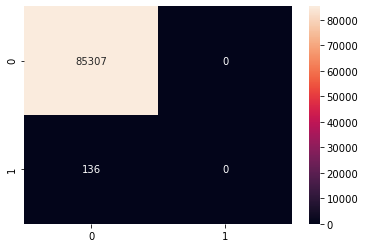

In [281]:
confusion_mat = confusion_matrix(y_test,y_predict)
sns.heatmap(confusion_mat, annot=True,fmt='g')

- here we can observe that our model is doing good for predicting not fraud as not fraud but it fails to prdict fraud as fraud.
- and we know that we are solving the classification problem which has to classify the fraduent trascation hence we have to build a model which classify the fraud trans as fraud trans.

<AxesSubplot:>

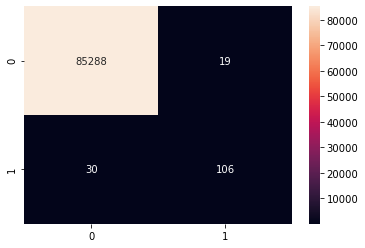

In [282]:
confusion_mat_th = confusion_matrix(y_test,y_predict_th)
sns.heatmap(confusion_mat_th, annot=True,fmt='g')

- just by applying the threshold value to 0.2 we can see the difference
- hence we should have to focus on the threshold value also with other parameters

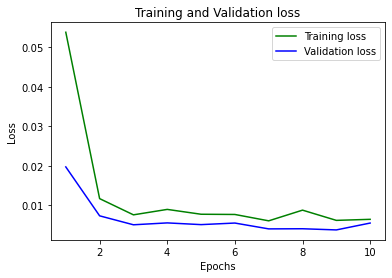

In [283]:
# loss viz
loss_train = model_his.history['loss']
loss_val = model_his.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

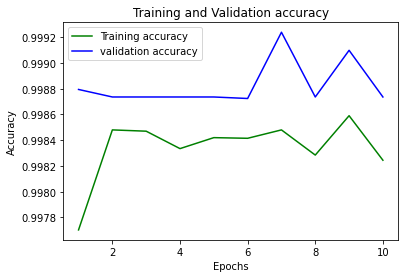

In [284]:
# acc viz
acc_train = model_his.history['accuracy']
acc_val = model_his.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Model 2

#### Processing the data and building the ANN model

In [169]:
X = df.drop('Class',axis=1)
y = df['Class']
X.shape, y.shape

((284807, 29), (284807,))

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [172]:
Scalar = StandardScaler()

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train, X_validate, y_train, y_validate = train_test_split(X_train_val,y_train_val,test_size=0.2,random_state=42)

X_train = Scalar.fit_transform(X_train)
X_validate = Scalar.fit_transform(X_validate)
X_test = Scalar.fit_transform(X_test)

val_fraud = y_train.value_counts()[0]/len(y_train)
val_no_fraud = y_train.value_counts()[1]/len(y_train)

print("fraud trans = {}".format(val_no_fraud))
print("not fraud trans = {}".format(val_fraud))

fraud trans = 0.0017994745785028623
not fraud trans = 0.9982005254214972


In [285]:
print("Training X_train {}, y_train {}".format(X_train.shape,y_train.shape))
print("Training X_validate {}, y_validate  {}".format(X_validate.shape,y_validate.shape))
print("Training X_test {}, y_test {}".format(X_test.shape,y_test.shape))

Training X_train (159491, 29), y_train (159491,)
Training X_validate (39873, 29), y_validate  (39873,)
Training X_test (85443, 29), y_test (85443,)


In [288]:
model2 = Sequential()
model2.add(Dense(64,activation='relu',input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(16,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(8,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.2))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 64)                1920      
_________________________________________________________________
batch_normalization_18 (Batc (None, 64)                256       
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_85 (Dense)             (None, 32)                2080      
_________________________________________________________________
batch_normalization_19 (Batc (None, 32)                128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 32)              

In [289]:
model2.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [290]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',min_delta=0.001,patience=5)

In [291]:
model2_his = model2.fit(X_train,y_train, validation_data=(X_validate,y_validate),epochs=50,batch_size=100,callbacks=early_stop)

Epoch 1/50
1595/1595 [==============================] - 6s 3ms/step - loss: 0.1174 - accuracy: 0.9685 - precision_5: 0.0118 - recall_5: 0.1986 - val_loss: 0.0137 - val_accuracy: 0.9989 - val_precision_5: 0.7600 - val_recall_5: 0.5507
Epoch 2/50
1595/1595 [==============================] - 4s 3ms/step - loss: 0.0195 - accuracy: 0.9979 - precision_5: 0.3017 - recall_5: 0.1220 - val_loss: 0.0083 - val_accuracy: 0.9990 - val_precision_5: 0.7544 - val_recall_5: 0.6232_5: 0.2588 -  - ETA: 0s - loss: 0.0200 - accuracy: 0.9979 - precision_5: 0.2897 - recall_5: 0.11 - ETA: 0s - loss: 0.0198 - accuracy: 0.9979 - precision_5: 0.2946 - recall_5: 0
Epoch 3/50
1595/1595 [==============================] - 4s 3ms/step - loss: 0.0140 - accuracy: 0.9982 - precision_5: 0.4583 - recall_5: 0.1533 - val_loss: 0.0073 - val_accuracy: 0.9991 - val_precision_5: 0.7705 - val_recall_5: 0.6812
Epoch 4/50
1595/1595 [==============================] - 4s 3ms/step - loss: 0.0115 - accuracy: 0.9983 - precision_5: 0.570

In [301]:
y_predict_test = model.predict(X_test)>0.13
ap_score_test = average_precision_score(y_test, y_predict_test)
print("The model test average precision score is {}.".format(ap_score_test))

The model test average precision score is 0.6632041597583478.


<AxesSubplot:>

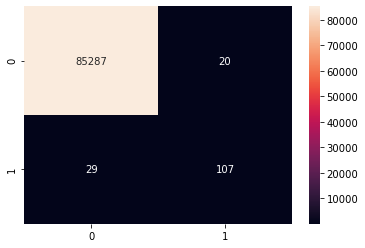

In [302]:
confusion_mat2 = confusion_matrix(y_test,y_predict_test)
sns.heatmap(confusion_mat2, annot=True,fmt='g')

In [303]:
model2_his.history.keys()

dict_keys(['loss', 'accuracy', 'precision_5', 'recall_5', 'val_loss', 'val_accuracy', 'val_precision_5', 'val_recall_5'])

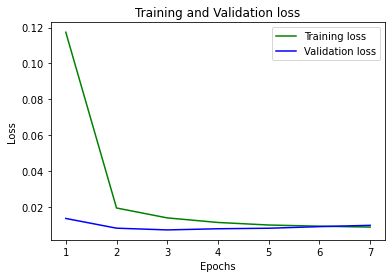

In [305]:
loss_train = model2_his.history['loss']
loss_val = model2_his.history['val_loss']
epochs = range(1,8)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

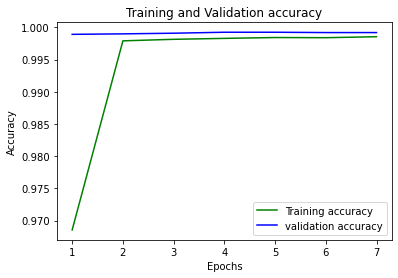

In [306]:
acc_train = model2_his.history['accuracy']
acc_val = model2_his.history['val_accuracy']
epochs = range(1,8)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

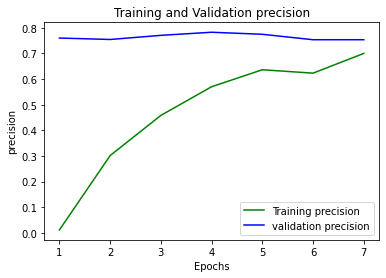

In [310]:
acc_train = model2_his.history['precision_5']
acc_val = model2_his.history['val_precision_5']
epochs = range(1,8)
plt.plot(epochs, acc_train, 'g', label='Training precision')
plt.plot(epochs, acc_val, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

# Model 3

In [320]:
model3 = Sequential()
model3.add(Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_99 (Dense)             (None, 128)               3840      
_________________________________________________________________
batch_normalization_24 (Batc (None, 128)               512       
_________________________________________________________________
dropout_24 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_100 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_101 (Dense)            (None, 128)               16512     
_________________________________________________________________
dropout_26 (Dropout)         (None, 128)             

In [321]:
model3.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
early_stop = EarlyStopping(monitor='accuracy',min_delta=0.001,patience=5)
model3_his = model3.fit(X_train,y_train, validation_data=(X_validate,y_validate),epochs=50,batch_size=200,callbacks=early_stop)

Epoch 1/50
798/798 [==============================] - 6s 6ms/step - loss: 0.0749 - accuracy: 0.9912 - precision_11: 0.0027 - recall_11: 0.0105 - val_loss: 0.0487 - val_accuracy: 0.9983 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 2/50
798/798 [==============================] - 5s 6ms/step - loss: 0.0331 - accuracy: 0.9982 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_loss: 0.0313 - val_accuracy: 0.9983 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 3/50
798/798 [==============================] - 5s 6ms/step - loss: 0.0256 - accuracy: 0.9982 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_loss: 0.0231 - val_accuracy: 0.9983 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+000.0
Epoch 4/50
798/798 [==============================] - 5s 6ms/step - loss: 0.0220 - accuracy: 0.9982 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00 - val_loss: 0.0197 - val_accuracy: 0.9983 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+

In [331]:
y_predict = np.argmax(model3.predict(X_test), axis=1)
y_predict_th = model3.predict(X_test)>0.1
ap_score = average_precision_score(y_test, predictions)
ap_score_th = average_precision_score(y_test, y_predict_th)
print("The model test average precision score is {}.".format(ap_score))
print("The model test average precision score with th is {}.".format(ap_score_th))

The model test average precision score is 0.3251473576298363.
The model test average precision score with th is 0.16838266251265008.


<AxesSubplot:>

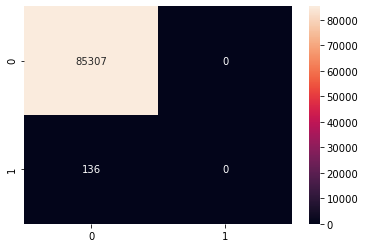

In [333]:
confusion_mat = confusion_matrix(y_test,y_predict)
sns.heatmap(confusion_mat, annot=True,fmt='g')


<AxesSubplot:>

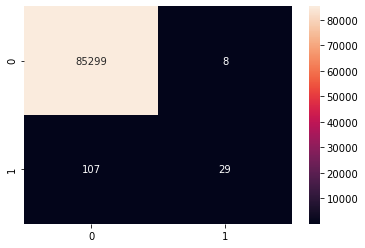

In [334]:
confusion_mat_th = confusion_matrix(y_test,y_predict_th)
sns.heatmap(confusion_mat_th, annot=True,fmt='g')

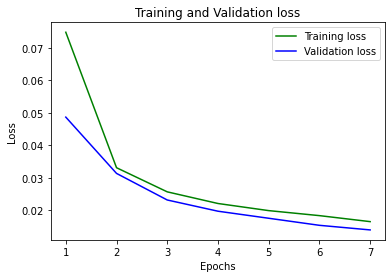

In [335]:
loss_train = model3_his.history['loss']
loss_val = model3_his.history['val_loss']
epochs = range(1,8)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

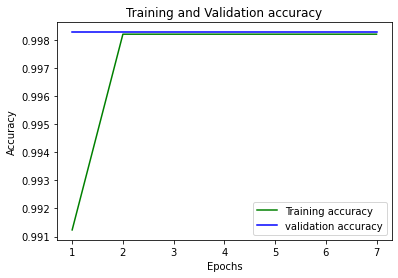

In [336]:
acc_train = model3_his.history['accuracy']
acc_val = model3_his.history['val_accuracy']
epochs = range(1,8)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

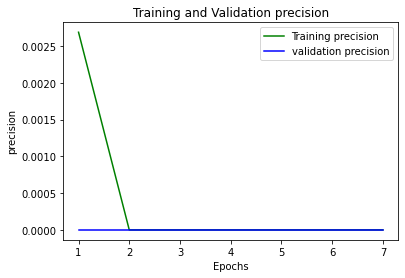

In [338]:
acc_train = model3_his.history['precision_11']
acc_val = model3_his.history['val_precision_11']
epochs = range(1,8)
plt.plot(epochs, acc_train, 'g', label='Training precision')
plt.plot(epochs, acc_val, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

# Model 4

In [340]:
model4 = Sequential()
model4.add(Dense(256,activation='relu',input_shape=(X_train.shape[1],)))
model4.add(Dense(256,activation='relu'))
model4.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model4.add(Dense(256,activation='relu'))
model4.add(Dense(256,activation='relu'))
model4.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model4.add(Dense(32,activation='relu'))
model4.add(Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 256)               7680      
_________________________________________________________________
dense_119 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_120 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_122 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_123 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_124 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_126 (Dense)            (None, 32)              

In [341]:
model4.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
early_stop = EarlyStopping(monitor='accuracy',min_delta=0.001,patience=5)
model4_his = model4.fit(X_train,y_train, validation_data=(X_validate,y_validate),epochs=50,batch_size=200,callbacks=early_stop)

Epoch 1/50
798/798 [==============================] - 4s 5ms/step - loss: 0.0660 - accuracy: 0.9981 - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_loss: 0.0189 - val_accuracy: 0.9983 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 2/50
798/798 [==============================] - 3s 4ms/step - loss: 0.0132 - accuracy: 0.9982 - precision_12: 0.0000e+00 - recall_12: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.9983 - val_precision_12: 0.0000e+00 - val_recall_12: 0.0000e+00
Epoch 3/50
798/798 [==============================] - 4s 4ms/step - loss: 0.0077 - accuracy: 0.9982 - precision_12: 1.0000 - recall_12: 0.0035 - val_loss: 0.0067 - val_accuracy: 0.9983 - val_precision_12: 1.0000 - val_recall_12: 0.0145
Epoch 4/50
798/798 [==============================] - 4s 5ms/step - loss: 0.0060 - accuracy: 0.9985 - precision_12: 0.8475 - recall_12: 0.1742 - val_loss: 0.0056 - val_accuracy: 0.9988 - val_precision_12: 0.8667 - val_recall_12: 0.3768
Epoch 5/50
798/798 [====

In [368]:
y_predict = np.argmax(model4.predict(X_test), axis=1)
y_predict_th = model4.predict(X_test)>0.17
ap_score = average_precision_score(y_test, predictions)
ap_score_th = average_precision_score(y_test, y_predict_th)
print("The model test average precision score is {}.".format(ap_score))
print("The model test average precision score with th is {}.".format(ap_score_th))

The model test average precision score is 0.3251473576298363.
The model test average precision score with th is 0.6165891113300768.


<AxesSubplot:>

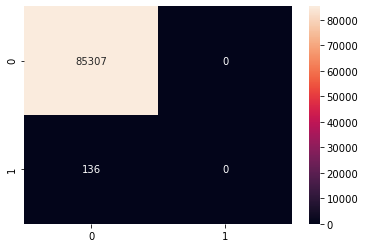

In [343]:
confusion_mat = confusion_matrix(y_test,y_predict)
sns.heatmap(confusion_mat, annot=True,fmt='g')

<AxesSubplot:>

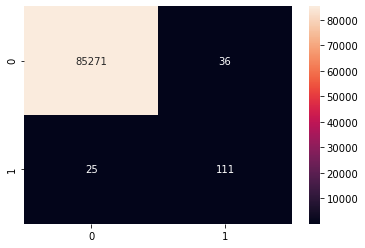

In [369]:
confusion_mat_th = confusion_matrix(y_test,y_predict_th)
sns.heatmap(confusion_mat_th, annot=True,fmt='g')

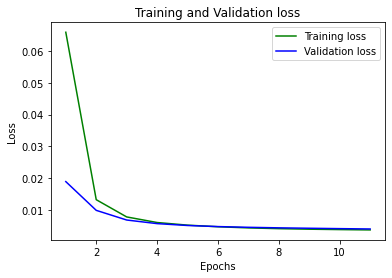

In [370]:
loss_train = model4_his.history['loss']
loss_val = model4_his.history['val_loss']
epochs = range(1,12)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

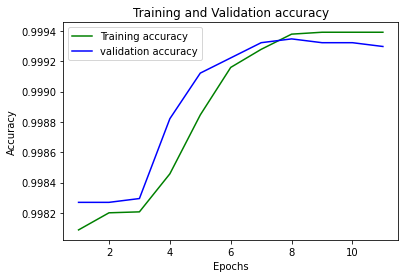

In [371]:
acc_train = model4_his.history['accuracy']
acc_val = model4_his.history['val_accuracy']
epochs = range(1,12)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

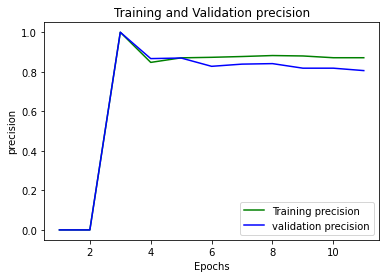

In [372]:
acc_train = model4_his.history['precision_12']
acc_val = model4_his.history['val_precision_12']
epochs = range(1,12)
plt.plot(epochs, acc_train, 'g', label='Training precision')
plt.plot(epochs, acc_val, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

# Model 5

In [373]:
model5 = Sequential()
model5.add(Dense(256,activation='relu',input_shape=(X_train.shape[1],)))
model5.add(Dropout(0.2))
model5.add(Dense(256,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(256,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(256,activation='relu'))
model5.add(Dense(256,activation='relu'))
model5.add(Dense(256,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(128,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(128,activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(64,activation='relu'))
model5.add(Dropout(0.1))
model5.add(Dense(32,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))
model5.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 256)               7680      
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_129 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_130 (Dense)            (None, 256)               65792     
_________________________________________________________________
dropout_34 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_131 (Dense)            (None, 256)             

In [375]:
model5.compile(optimizer='sgd',loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
early_stop = EarlyStopping(monitor='accuracy',min_delta=0.001,patience=5)
model5_his = model5.fit(X_train,y_train, validation_data=(X_validate,y_validate),epochs=50,batch_size=100,callbacks=early_stop)

Epoch 1/50
1595/1595 [==============================] - 12s 7ms/step - loss: 0.0201 - accuracy: 0.9982 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.9983 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 2/50
1595/1595 [==============================] - 11s 7ms/step - loss: 0.0138 - accuracy: 0.9982 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - val_loss: 0.0094 - val_accuracy: 0.9983 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 3/50
1595/1595 [==============================] - 11s 7ms/step - loss: 0.0105 - accuracy: 0.9982 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - val_loss: 0.0073 - val_accuracy: 0.9983 - val_precision_14: 0.0000e+00 - val_recall_14: 0.0000e+00
Epoch 4/50
1595/1595 [==============================] - 11s 7ms/step - loss: 0.0083 - accuracy: 0.9982 - precision_14: 0.0000e+00 - recall_14: 0.0000e+00 - val_loss: 0.0056 - val_accuracy: 0.9983 - val_precision_14: 0.0000e+00 - val_re

In [393]:
y_predict = np.argmax(model5.predict(X_test), axis=1)
y_predict_th = model5.predict(X_test)>0.25
ap_score = average_precision_score(y_test, predictions)
ap_score_th = average_precision_score(y_test, y_predict_th)
print("The model test average precision score is {}.".format(ap_score))
print("The model test average precision score with th is {}.".format(ap_score_th))

The model test average precision score is 0.3251473576298363.
The model test average precision score with th is 0.6855955056139688.


<AxesSubplot:>

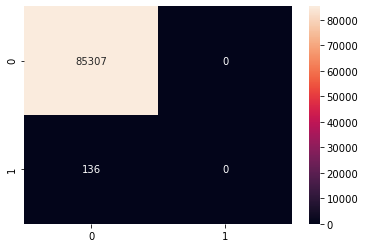

In [377]:
confusion_mat = confusion_matrix(y_test,y_predict)
sns.heatmap(confusion_mat, annot=True,fmt='g')

<AxesSubplot:>

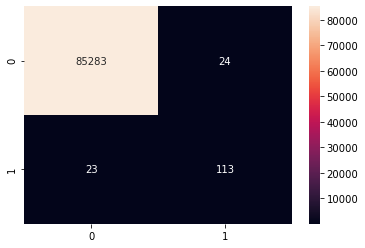

In [394]:
confusion_mat_th = confusion_matrix(y_test,y_predict_th)
sns.heatmap(confusion_mat_th, annot=True,fmt='g')

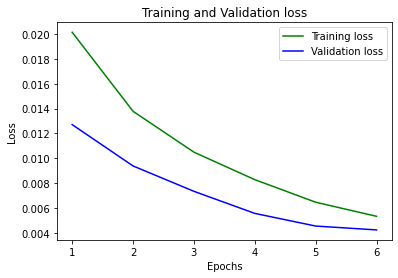

In [395]:
loss_train = model5_his.history['loss']
loss_val = model5_his.history['val_loss']
epochs = range(1,7)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

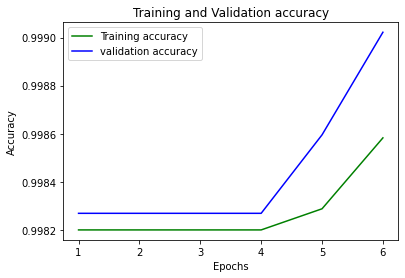

In [396]:
acc_train = model5_his.history['accuracy']
acc_val = model5_his.history['val_accuracy']
epochs = range(1,7)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

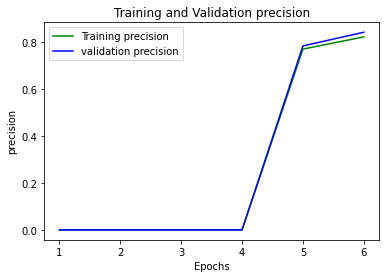

In [397]:
acc_train = model5_his.history['precision_14']
acc_val = model5_his.history['val_precision_14']
epochs = range(1,7)
plt.plot(epochs, acc_train, 'g', label='Training precision')
plt.plot(epochs, acc_val, 'b', label='validation precision')
plt.title('Training and Validation precision')
plt.xlabel('Epochs')
plt.ylabel('precision')
plt.legend()
plt.show()

# Final Conclusion 
- Model 5 is performing better as compare to other model with threshold of 0.25.
- after comparing all ANN model Model 5 is best but we may modify the model or reduce the layer to work with similar output if possible.
- Model 5 accuracy
    1. Training Acc = 99.86
    2. Testing Acc = 99.90
- Model 5 Loss
    1. Training Loss =  0.0053
    2. Testing Loss = 0.0042
- Model 5 Precision 
    1. Training Precision = 0.8211 
    2. Testing Precision = 0.8409

- Model 5 is predicting 113 fraud out of 136 are fraud trans but not able to predict remaining 23 which is also doing better than other models
- Model 5 test average precision score with th 0.25 is 0.6855955056139688.


## Architecture of Model 5
- This model has 11 hidden layers with variable neurons (256, 128 , 64, 32) and input layer with 29 neurons and op layer with 1 neuron which uses sigmoid activation function which soften the output rather than direct 0 and 1 and it pass 0 if op <0 else 1.
- we have used all default optimizers and loss function with early stopping to stop the training of model and dropout to drop 20%  or 10% of neurons connection to make our model robust
